# RESULT NOTEBOOK
In this notebook, we begin to perform analyses on the **processed datasets**.
The initial BeerAdvocate and Ratebeer datasets were modified as follows:

- Removal of duplicates
- Adjustment and correction of *location* formatting
- Consistency check on data types for each column
- Removal of beers that had *nbr_ratings*==0
- Check distribution of data
- Recomputation of matrics for beer ratings (*overall_score* and *style_score*)


In [32]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scr.utils as utils
importlib.reload(utils)

<module 'scr.utils' from 'C:\\Users\\chiar\\OneDrive\\Documenti\\EPFL-DH\\Applied_Data_Analysis\\P2\\ada-2024-project-mediterranean\\scr\\utils.py'>

In [1]:
original_PATH = 'data/Original'
processed_PATH = 'data/Processed'

In [4]:
# Loading Data non-processed
beer_ba = pd.read_csv(original_PATH + '/BeerAdvocate/beers.csv')
breweries_ba = pd.read_csv(original_PATH + '/BeerAdvocate/breweries.csv')
users_ba = pd.read_csv(original_PATH + '/BeerAdvocate/users.csv')
beer_rb = pd.read_csv(original_PATH + '/RateBeer/beers.csv')
breweries_rb = pd.read_csv(original_PATH + '/RateBeer/breweries.csv')
users_rb = pd.read_csv(original_PATH + '/RateBeer/users.csv')

# Loading Data Processed
beer_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/beers_processed.csv')
breweries_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/breweries_processed.csv')
users_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/users_processed.csv')
beer_RB = pd.read_csv(processed_PATH + '/RateBeer/beers_processed.csv')
breweries_RB = pd.read_csv(processed_PATH + '/RateBeer/breweries_processed.csv')
users_RB = pd.read_csv(processed_PATH + '/RateBeer/users_processed.csv')

C:\Users\chiar\AppData\Local\Temp\ipykernel_52452\4141917664.py:13: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  beer_RB = pd.read_csv(processed_PATH + '/RateBeer/beers_processed.csv')


In [6]:
# Let's do an example on the beer_ba dataset
utils.check_differences(beer_rb, beer_RB, 'RateBeer','Processed RateBeer')
print('\n')
utils.check_differences(beer_ba, beer_BA, 'BeerAdvocate','Processed BeerAdvocate')

The starting dimensions of dataset RateBeer was: (442081, 14)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
The processed dataset Processed RateBeer  has dimensions: (397044, 19)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')


The starting dimensions of dataset BeerAdvocate was: (280823, 15)
Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_v

## USERS ANALYSIS
### Variation of users in platform during time per location 

**Goal**: Understand the geographic and demographic distribution of user bases within each dataset to assess their representativeness.

**Approach**: We now want to investigate **how the number of users has changed over time and by location**. What we do is to divide the users by year and by *'location'* by counting how many users there are for each location for each year. 
We convert the result to a pivot table, with *year_joined* as index and *location* as columns, and user counts as values. We set fill_value=0 to fill any empty cells (years and locations without users) with zero.

*Note:* We need to perform a cumulative sum because the users who register in a given year add up to those who were already registered in previous years. So, We want to know the total number of users for each year and how they are distributed by location.

*Note:* The table rows created can be of great help in understanding who is doing the reviews and how much each location is contributing to the overall preference!

In [13]:
table_users_BA = utils.nbr_user_per_location_per_time(users_BA, 'BeerAdvocate Processed')
table_users_RB = utils.nbr_user_per_location_per_time(users_RB, 'RateBeer Processed')
# Just as an example
table_users_BA.head()

location,Afghanistan,Albania,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Aotearoa,Argentina,...,United Arab Emirates,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Zimbabwe,Total
year_joined,,,,,,,,,,,,,,,,,,,,,
1996.0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,3
2000.0,0,0,0,0,0,0,0,0,0,0,...,0,7,0,0,0,0,0,0,0,7
2001.0,0,0,0,0,0,0,0,0,0,0,...,0,80,0,0,0,0,0,0,0,83
2002.0,0,0,0,0,0,0,0,0,1,0,...,0,388,0,0,0,0,0,0,0,420
2003.0,0,0,0,0,0,0,0,0,1,0,...,0,1122,0,0,0,0,0,0,0,1213


Let us identify and visualise what has been the **change over time of the n locations** where the site is most used. As we can see, in the US the site has a whirlwind growth, while in other continents the growth is existing but less pronounced. 
This leads us to reflect on the need to conduct a separate analysis for states within the US to investigate whether there are differences within US states or whether preferences are shared across the continent

Top 7 locations: ['United States', 'Canada', 'England', 'Australia', 'Germany', 'Sweden', 'Netherlands']
Top 7 locations: ['United States', 'Canada', 'Australia', 'Denmark', 'England', 'Netherlands', 'Belgium']


C:\Users\chiar\AppData\Local\Temp\ipykernel_52452\1069659994.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', len(n_most_used_location_BA))  # Using 'Paired' colormap


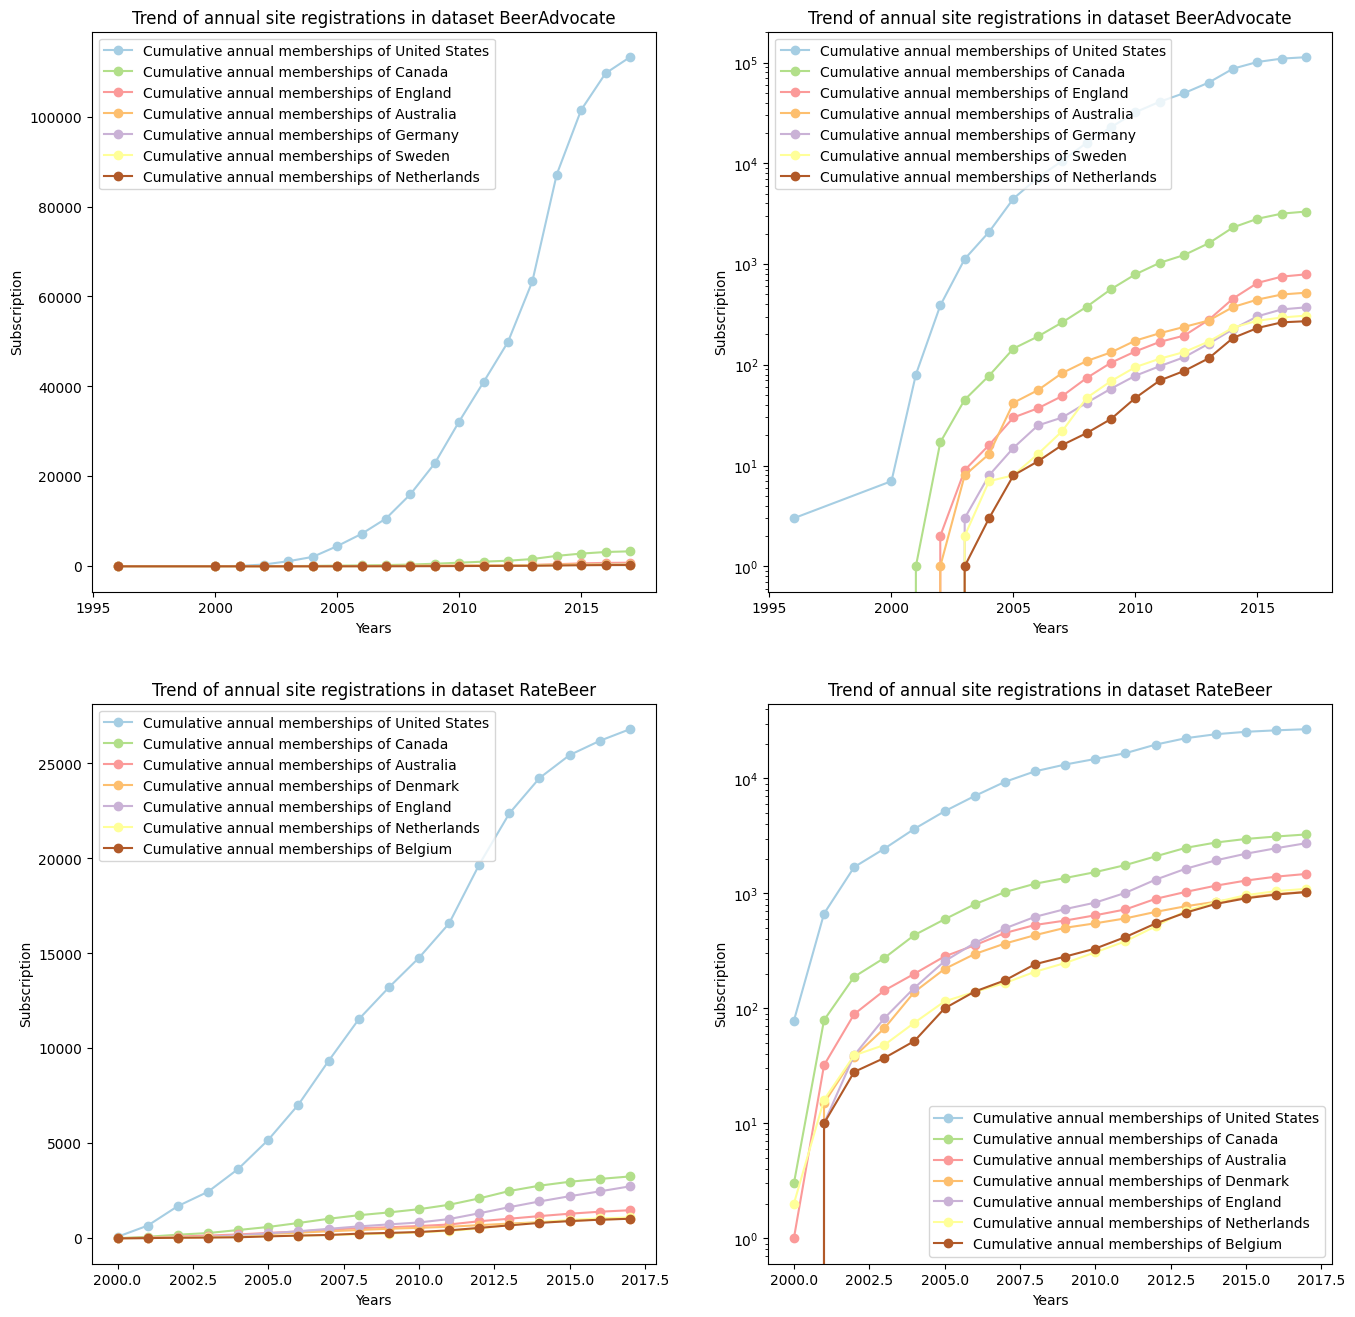

In [10]:
# This function returns the locations that have been in the top-n for the number of users across all the years stored in the database.
n_most_used_location_BA = utils.find_top_n(table_users_BA, n=7)
n_most_used_location_RB = utils.find_top_n(table_users_RB, n=7)

colors = plt.cm.get_cmap('Paired', len(n_most_used_location_BA))  # Using 'Paired' colormap 
fig , ax = plt.subplots(2,2, figsize=(16,16))
plt.sca(ax[0, 0])
for i,loc in enumerate(n_most_used_location_BA):
    utils.time_machine(table_users_BA, 'BeerAdvocate', loc, colors(i), scale ='linear')

plt.sca(ax[0, 1])
for i,loc in enumerate(n_most_used_location_BA):
    utils.time_machine(table_users_BA, 'BeerAdvocate', loc, colors(i), scale ='log')

plt.sca(ax[1, 0])
for i,loc in enumerate(n_most_used_location_RB):
    utils.time_machine(table_users_RB, 'RateBeer', loc, colors(i), scale ='linear')

plt.sca(ax[1, 1])
for i,loc in enumerate(n_most_used_location_RB):
    utils.time_machine(table_users_RB, 'RateBeer', loc, colors(i), scale ='log')



## BREWER ANALYSIS
### Distribution of breweres all over the World 
**Goal**: Understand the geographic and demographic distribution of breweries bases within each dataset to assess their representativeness.

**Approach**: In this part, we want to analyse the **geographical distribution** of **breweries** in order to better understand user distribution data

In [17]:
# This function returns a dataframe that provides statistical analysis related to the brewery dataframe.
# Specifically, it calculates, for each location, the total number of beers, the average number of beers, and the standard deviation and median.
dist_RB = utils.loc_distribution(breweries_RB, 'RateBeer', 'location')
dist_BA = utils.loc_distribution(breweries_BA, 'BeerAdvocate', 'location')
# Now we evaluate within the US
dist_RB_US = utils.loc_distribution(breweries_RB[breweries_RB['US']==True], 'RateBeer_US', 'location_region')
dist_BA_US = utils.loc_distribution(breweries_BA[breweries_BA['US']==True], 'BeerAdvocate_US', 'location_region') 
# Just as an example
dist_RB_US.head()

Dataset: RateBeer
- Number of unique "location" value in the dataset: 217
Dataset: BeerAdvocate
- Number of unique "location" value in the dataset: 201
Dataset: RateBeer_US
- Number of unique "location" value in the dataset: 1
Dataset: BeerAdvocate_US
- Number of unique "location" value in the dataset: 1


,location_region,brewery_count,total_beers,mean_beers,std_beers,median_beers
0,Alabama,42,1020,24.285714,28.015924,14.5
1,Alaska,35,1561,44.600000,49.716372,27.0
2,Arizona,115,3664,31.860870,35.719641,21.0
3,Arkansas,32,456,14.250000,11.322259,11.0
4,California,861,28535,33.141696,45.063221,16.0


Let's take a look on the top_boundaries of our dataset. We can notice that the max number of beer for brewer in BA dataset is way highter than in RB!

In [12]:
print('Max number of beer for BA:', breweries_BA['nbr_beers'].max(),'\nMax number of beer for RB:',breweries_RB['nbr_beers'].max())

Max number of beer for BA: 1196 
Max number of beer for RB: 295


We select the locations with the most breweries and plot the number of breweries for the top n (=15) locations. We do this for both the complete dataset and the subset that only includes the US. What we observe is that, in both datasets, the US has the most breweries, and within the US, there is a large variability represented by the standard deviation in the plot."

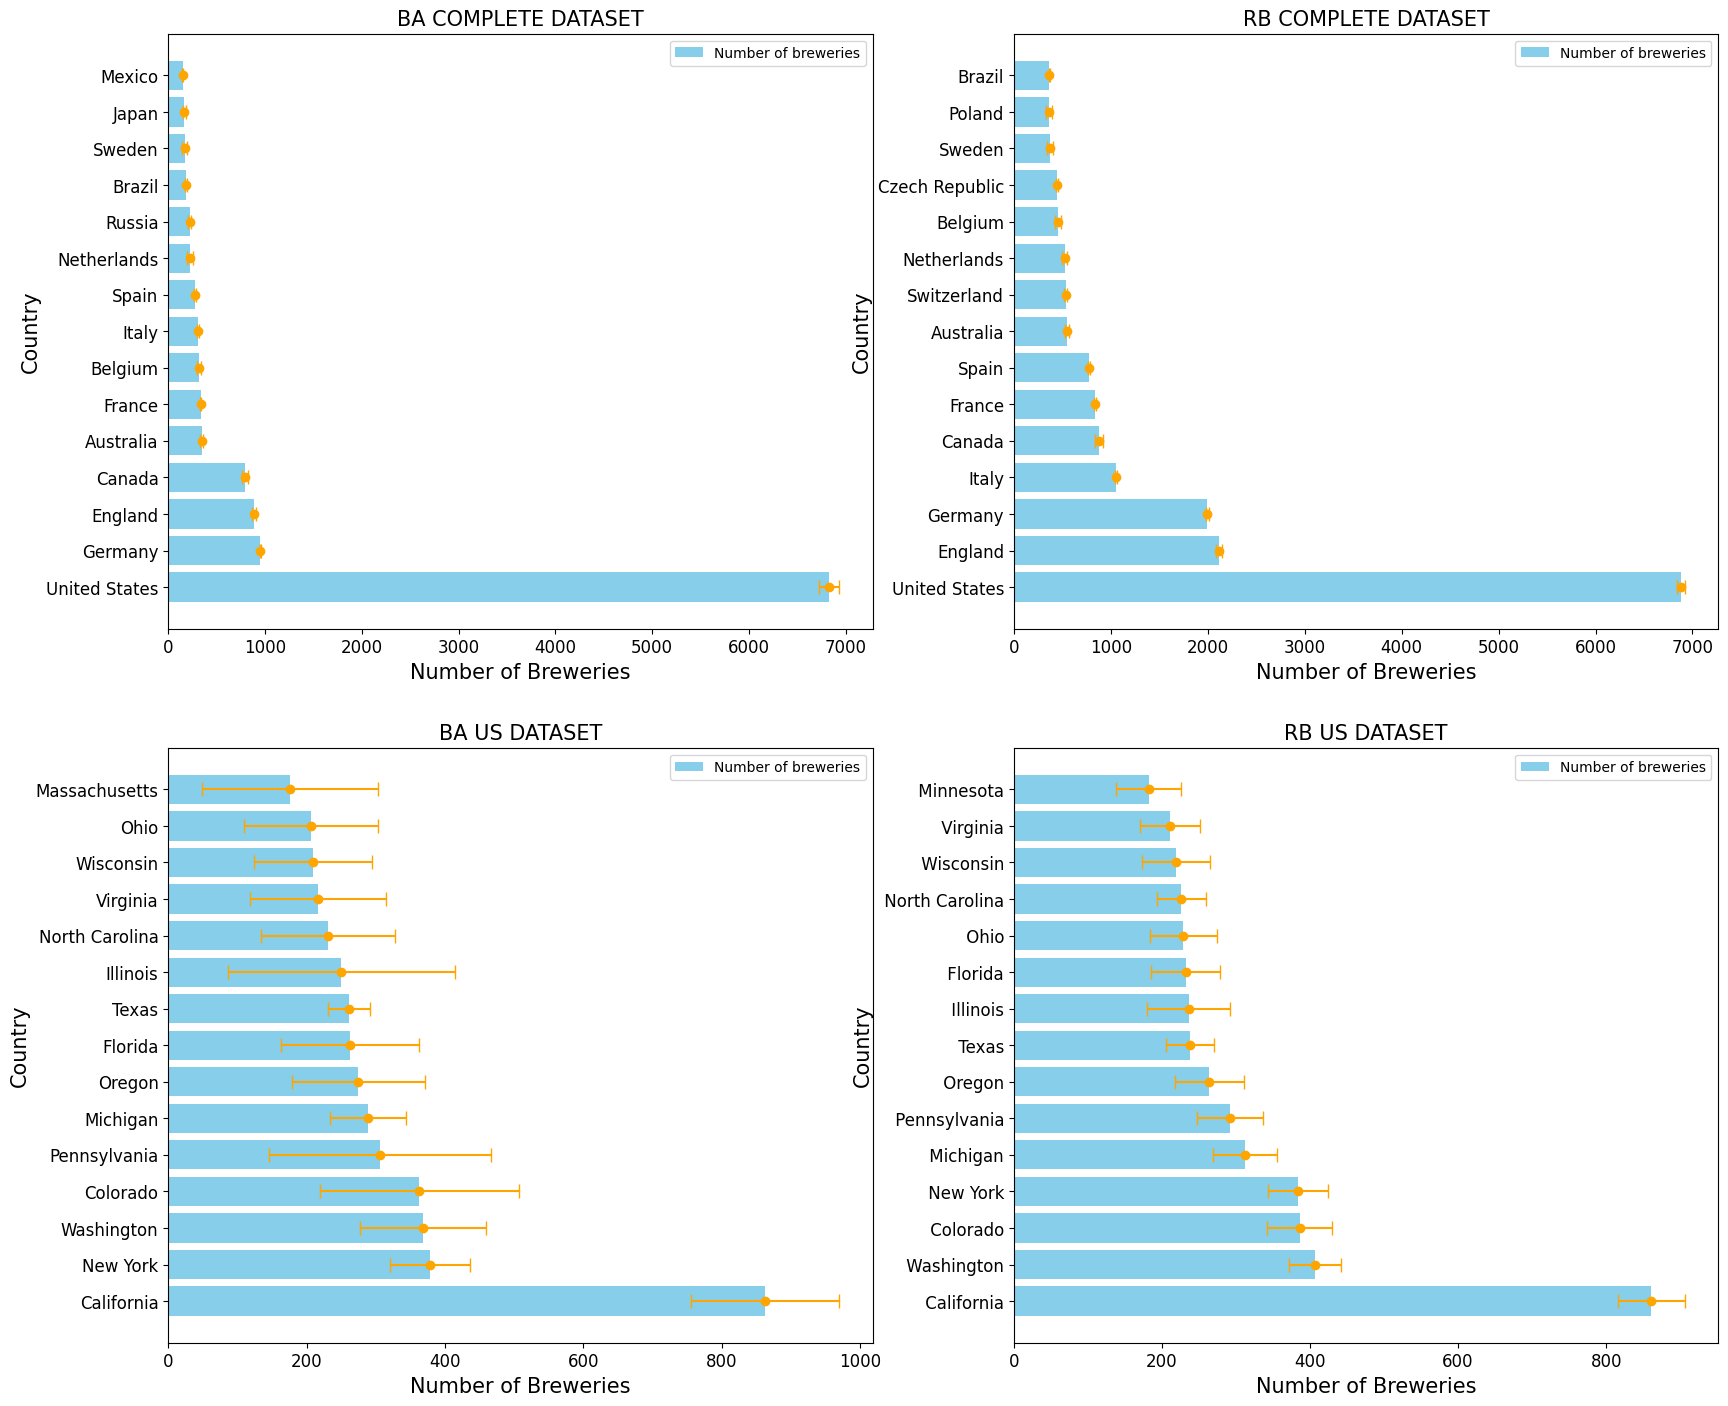

In [29]:
utils.comparing_plot(dist_BA, dist_RB, dist_BA_US, dist_RB_US,n=15)

C:\Users\chiar\OneDrive\Documenti\EPFL-DH\Applied_Data_Analysis\P2\ada-2024-project-mediterranean\scr\utils.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data['mean_beers']=round(table_data['mean_beers'],2) # We round the data for a better readability


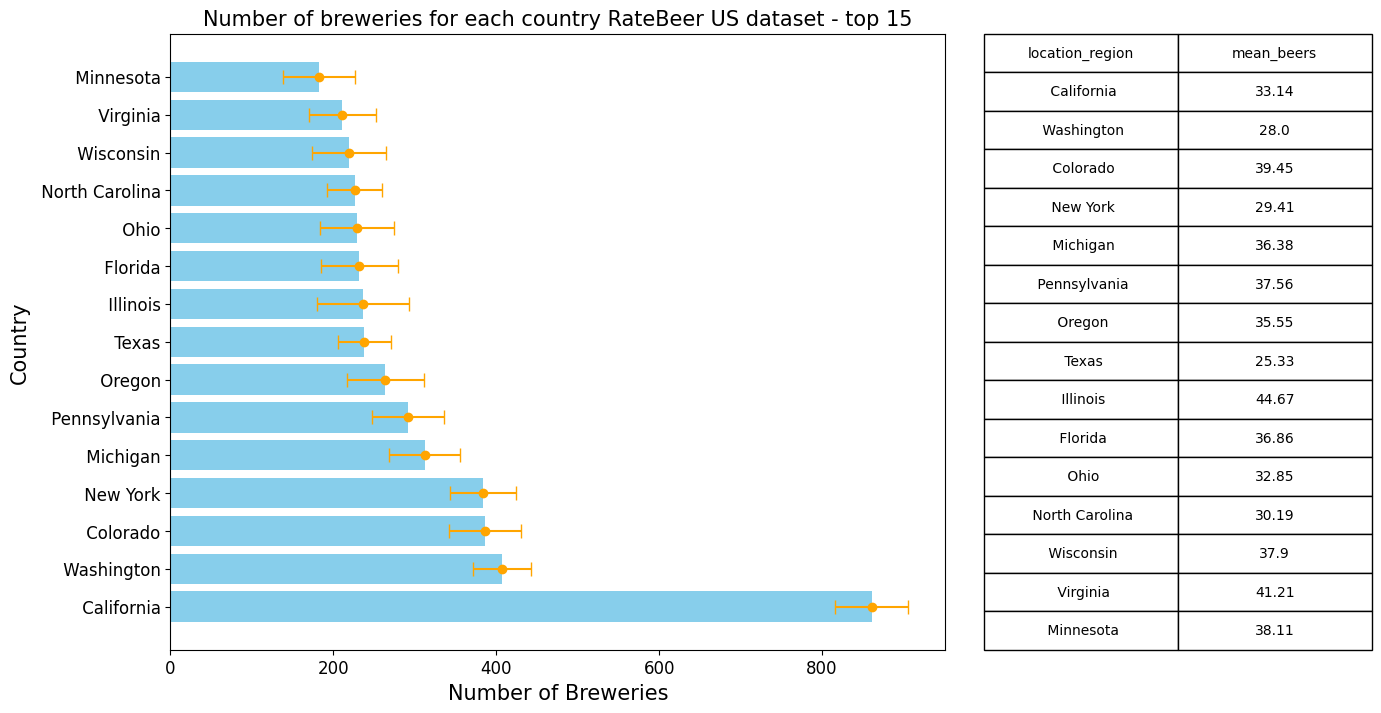

In [35]:
# We can further deepen the analysis by investigating how many beers, on average, are available at a location within a brewery."
#utils.plotting_dist(dist_BA,'BeerAdvocate',n=15)
#utils.plotting_dist(dist_RB,'RateBeer',n=15)
#utils.plotting_dist(dist_BA_US,'BeerAdvocate US',n=15,location='location_region')
utils.plotting_dist(dist_RB_US,'RateBeer US',n=15,location='location_region')